In [1]:
import numpy as np
# Length and width of a newborn's skull
data = [191, 155, 195, 149, 181, 148, 183, 153, 176, 144, 208, 157, 189, 150,
197, 159, 188, 152, 192, 150, 179, 158, 183, 147, 174, 150, 190, 159, 188,
151, 163, 137, 195, 155, 186, 153, 181, 145, 175, 140, 192, 154, 174, 143,
176, 139, 197, 167, 190, 163]
x1 = [data[i] for i in range(0,len(data),2)]
x2 = [data[i] for i in range(1,len(data),2)]

In [2]:
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)

centered_x1 = x1 - mean_x1
centered_x2 = x2 - mean_x2

In [3]:
cov_xy = np.mean(centered_x1 * centered_x2)
cov_xy

50.753599999999985

In [4]:
# Вычисление ковариации вручную
cov_x1_x2 = np.mean(centered_x1 * centered_x2)
cov_x1_x1 = np.mean(centered_x1 ** 2)
cov_x2_x2 = np.mean(centered_x2 ** 2)

# Собираем ковариационную матрицу
cov_matrix = np.array([[cov_x1_x1, cov_x1_x2],
                       [cov_x1_x2, cov_x2_x2]])

print("Covariance Matrix (manual):")
print(cov_matrix)

Covariance Matrix (manual):
[[91.4816 50.7536]
 [50.7536 52.1856]]


In [16]:
A = np.vstack([centered_x1,centered_x2]).T

cov_matrix_matrix = A.T @ A / len(A)
cov_matrix_matrix

array([[91.4816, 50.7536],
       [50.7536, 52.1856]])

In [10]:
cov = np.cov(A.T)
cov

array([[95.29333333, 52.86833333],
       [52.86833333, 54.36      ]])

In [68]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_matrix)
eigenvalues, eigenvectors

sorted_indices = np.argsort(eigenvalues)[::-1]
eigvals_sorted = eigenvalues[sorted_indices]
eigvecs_sorted = eigenvectors[:, sorted_indices]

# Извлекаем главные компоненты
v1 = eigvecs_sorted[:, 0]  # Первый вектор
v2 = eigvecs_sorted[:, 1] 

In [70]:
total_variance = np.sum(eigenvalues)
explained_variance = eigenvalues / total_variance * 100
explained_variance

array([87.8819942, 12.1180058])

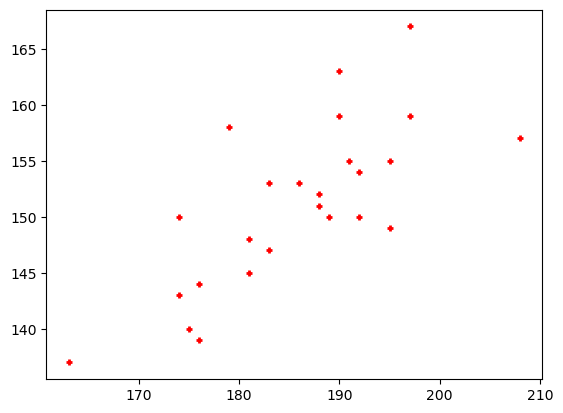

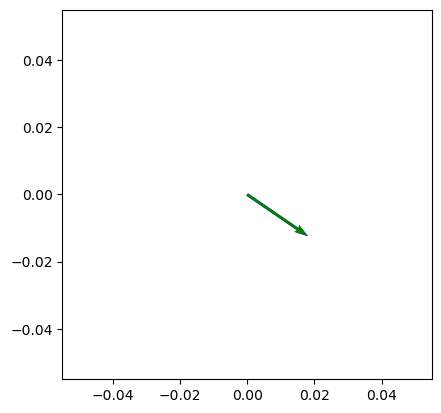

In [72]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, s = 20, c = 'red', marker = '+', linewidth = 2)
plt.show()
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
ax = plt.gca()
ax.set_aspect(1)
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, v1[0] v[1,v2[0] , color=['b','g'], scale=5)